In [1]:
import pandas as pd
df = pd.read_csv("survey.csv")

In [2]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


Initial thoughts:
The comments seems to be mostly NaN values, so I'll get rid of that column.
I don't really care about the time, so I'll drop that too. 
Gender seems to be in a lot of different formats. I wonder what the unique values of each are? 

In [3]:
df = df.drop(columns=["Timestamp","comments"])

Now let's deal with the other columns.

In [4]:
for c in df.columns:
    print("unique values of", c, "are: \n", df[c].unique())

unique values of Age are: 
 [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
unique values of Gender are: 
 ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-f

Thoughts: I could convert a lot of these to booleans, if I felt like it, but I probably shouldn't because of the "I don't know" and "Maybe" answers.
There's a lot of categorical data, in fact, it's mostly categorical data.
The gender seemed to be a "fill in your own" one. I'm wondering if I could get counts on each?
In terms of age, I probably want to get rid of the negative values, unless there's a lot of them, plus that 99999 one. 

I wonder how many total entries I have? I'll figure it out below.

In [5]:
df.size

31475

**that's wrong**, I'll figure out later because I just scrolled back up and it's 1259 rows which is not a whole lot, but it's easy to work with. Now let's deal with the gender thing. Googled a bit and found value_counts() so we'll see if it works.

In [6]:
df.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Female (trans)                                      2
Man                                                 2
Cis Male                                            2
Neuter                                              1
Trans-female                                        1
Malr                                                1
p                           

perfect, that does exactly what I want it to do.
I think I'll make a "gender non-conforming" category for anyone that didn't answer strongly in the male or female direction. "Male-ish", and "Female (trans)" will get classified as male and female, respectively, whereas "genderqueer" and "male-leaning androgynous" will be in "gender non-conforming". I'll just drop stuff I can't figure out, like "a little about you" and "p". I wonder what would happen if I excluded gender from the analysis. We'll see later.

Looking at the data and data description again, work_infere looks interesting but I'll have to look closer at it. I should probably figure out what I want my question to be before I look any farther. Then I can do some EDA.

In [7]:
df.work_interfere.describe()

count           995
unique            4
top       Sometimes
freq            465
Name: work_interfere, dtype: object

In [8]:
df.treatment

0       Yes
1        No
2        No
3       Yes
4        No
       ... 
1254    Yes
1255    Yes
1256    Yes
1257     No
1258    Yes
Name: treatment, Length: 1259, dtype: object

In [9]:
df.obs_consequence.isnull().values.any() #False, so no null values in there

False

**Question (Possible)**  
- What factors contribute towards <em> treatment </em> variable? Maybe *family_history*?  
- Employer attitudes towards mental health in the workplace  
    - Maybe compute a score based on some score of the other variables 
- Employees attitudes towards mental health in the workplace
    - Maybe compute a score based on some score of the other variables 
    
**Preliminary Questions**
1. What are the strongest predictors of whether someone got treatment for mental heath (*treatment*)?
2. What is the strongest predictor of an employer's attitude towards mental heath?
    - need to define "employer's attitude towards mental health" 

## Question 1: What are the strongest predictors of whether someone got treatment for mental heath (*treatment*)?  
need to deal with missing values for each columns

In [10]:
df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,NC,No,No,No,NaN,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [11]:
df.replace({'Gender': {'male': 'Male', 'M': 'Male', 'm': 'Male', 'Make': 'Male', 
                       'Man': 'Male', 'Malr':'Male', 'maile': 'Male', 'Mal': 'Male',
                        'maile': 'Male', 'msle':'Male', 'cis male': 'Male', 'Mail': 'Male',
                       'Male (CIS)':'Male', 'Cis male': 'Male', 'Cis Man': 'Male','Cis Male': 'Male',
                       'F': 'Female', 'f':'Female', 'female':'Female', 'Woman': 'Female', 
                       'Female (trans)': 'Female', 'femail':'Female', 'Female (cis)':'Female',
                       'Trans woman': 'Female', 'cis-female/femme': 'Female', 'Cis Female':'Female',
                      'Femake': 'Female', 'Trans-female':'Female', 'woman':'Female', 'Female ': 'Female',
                      'Male ': 'Male',
                      'Genderqueer':'Gender non-conforming', 'Androgyne': 'Gender non-conforming',
                      'Agender': 'Gender non-conforming', 'Nah':'Gender non-conforming', 
                      'Enby':'Gender non-conforming', 'fluid': 'Gender non-conforming', 
                      'something kinda male?': 'Gender non-conforming', 'Neuter':'Gender non-conforming',
                      'queer/she/they':'Gender non-conforming', 'male leaning androgynous':'Gender non-conforming',
                      'Male-ish': 'Gender non-conforming', 'All': 'Gender non-conforming', 
                      'Guy (-ish) ^_^': 'Gender non-conforming', 'queer':'Gender non-conforming',
                      'non-binary': 'Gender non-conforming', 'ostensibly male, unsure what that really means': 'Male'}},
                       inplace=True)

In [12]:
df.Gender.value_counts()

Male                     991
Female                   251
Gender non-conforming     15
p                          1
A little about you         1
Name: Gender, dtype: int64

wanna make distribution of gender variable

In [13]:
#drop the rows that I don't like
mydf = df[df.Gender != 'p']
mydf = mydf[mydf.Gender != 'A little about you']
mydf.Gender.value_counts()

Male                     991
Female                   251
Gender non-conforming     15
Name: Gender, dtype: int64

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

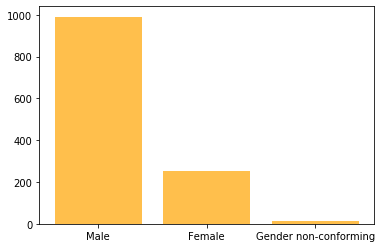

In [15]:
#gender = mydf.groupby('Gender').agg('count') # cool command, but I don't think it's what I need

#get values of gender and counts in different lists
gender = ['Male', 'Female', 'Gender non-conforming']
gen_counts = mydf.Gender.value_counts().tolist()
plt.bar(gender, gen_counts, color='orange',alpha=0.7)

I don't really like that, it's not really giving me what I want

In [16]:
total_gender = 0
for g in gen_counts: total_gender += g;
total_gender
percent_gender = [g/total_gender for g in gen_counts]
percent_gender

[0.7883850437549722, 0.19968178202068418, 0.011933174224343675]

In [17]:
gen_dict = {gender[i]: percent_gender[i] for i in range(len(gender))}
gen_dict

{'Male': 0.7883850437549722,
 'Female': 0.19968178202068418,
 'Gender non-conforming': 0.011933174224343675}

Conclusion: 78% percent male, 20% female, about 1% gender non-conforming

**Start doing PCA for Exploratory Data Analysis**

In [18]:
ydf = mydf["treatment"]
xdf = mydf.drop(columns=["treatment"])

In [19]:
xdf

,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,NaN,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,NaN,No,No,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,IL,No,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,CA,No,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,NC,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


**Actually let's try _MCA_**

In [20]:
#mydf.to_csv('survey_cleaner.csv')

Did an MCA analysis in R - no single variable stood out as explaining anything although geographic location might have something to do with it.

Maybe try a regression?

**More Exploring the Data**  
What does treatment look like?

No handles with labels found to put in legend.


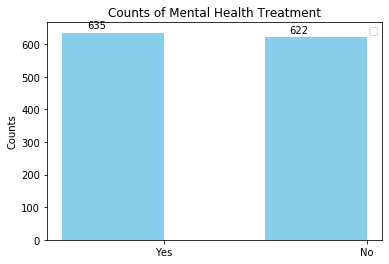

In [21]:
treatment = ['Yes', 'No']
treat_counts = mydf.treatment.value_counts().tolist()
# plt.bar(treatment, treat_counts, color='#42f56f',alpha=0.7)
# for c in treat_counts:
#     axes.text(c)

import numpy as np
    
ind = np.arange(len(treat_counts))  # the x locations for the groups
width = 0.50  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, treat_counts, width,
                color='SkyBlue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Counts of Mental Health Treatment')
ax.set_xticks(ind)
ax.set_xticklabels(treatment)
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")

plt.show()


So roughly equal numbers of people got treatment as did not.  
Age - what does that variable look like?

In [22]:
mydf["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,          11,
                72])

In [23]:
#Clean Age column a bit

# Drop rows for which column Age has bad values
for badage in [99999999999, -1726, 329]: #there's more bad values, but I don't want to drop like all of my data if age doesn't matter
    indexnames = mydf[mydf['Age'] == badage].index
    # Delete these row indexes from dataFrame
    mydf.drop(indexnames , inplace=True)
    
#turn -29 into positive 29 
mydf.replace({'Age': {-29 : 29}}, inplace=True)
mydf["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61, 11, 72])

Ok, so what's the deal with Age?

In [24]:
mydf.Age.describe()

count    1254.000000
mean       32.035885
std         7.344199
min         5.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

In [25]:
#I wanna try UpSetR on it
#mydf.to_csv('survey_cleaner1.csv')

In [26]:
mydf.Gender.value_counts()

Male                     989
Female                   251
Gender non-conforming     14
Name: Gender, dtype: int64

**See how just the UpSetR set looks**

In [58]:
df = mydf 
common_set = df[(df["mental_health_interview"] == "No") & 
             (df["tech_company"] == "Yes") & 
             (df["obs_consequence"] == "No") &
             (df["self_employed"] == "No")] 

I know that these have all the same values in *mental_health_interview, tech_company, obs_consequence, self_employed*, so I'll drop those (basically they're constant) and make a correlation plot.

In [59]:
common_set = common_set.drop(columns=["mental_health_interview", "tech_company", "obs_consequence", "self_employed"])

In [60]:
def get_unique(df):
    for c in df.columns:
            print("unique values of", c, "are: \n", df[c].unique())
get_unique(common_set)

unique values of Age are: 
 [29 46 33 34 37 32 30 40 38 50 35 27 18 22 28 23 19 31 25 24 44 36 39 26
 42 45 43 41 56 54 55 21 48 20 57 58 47 49  5 51 53 60]
unique values of Gender are: 
 ['Male' 'Female' 'Gender non-conforming']
unique values of Country are: 
 ['United States' 'United Kingdom' 'Canada' 'Portugal' 'Netherlands'
 'Switzerland' 'Australia' 'France' 'Slovenia' 'Austria' 'Russia'
 'Ireland' 'Bulgaria' 'South Africa' 'Poland' 'Colombia' 'Latvia' 'Sweden'
 'Germany' 'Spain' 'Finland' 'Uruguay' 'Brazil' 'Israel' 'New Zealand'
 'Singapore' 'Nigeria' 'India' 'Belgium' 'Norway' 'Italy' 'Greece']
unique values of state are: 
 ['NY' 'MA' 'CA' 'TN' 'OH' nan 'WI' 'IN' 'MI' 'TX' 'IL' 'UT' 'OR' 'MO' 'AZ'
 'WA' 'CT' 'GA' 'DC' 'MN' 'IA' 'MD' 'PA' 'NC' 'KS' 'VA' 'NH' 'NV' 'CO'
 'NJ' 'SC' 'AL' 'OK' 'KY' 'RI' 'WY' 'NM' 'FL' 'ME' 'SD' 'VT']
unique values of family_history are: 
 ['Yes' 'No']
unique values of treatment are: 
 ['Yes' 'No']
unique values of work_interfere are: 
 ['Sometimes' '

In [61]:
common_set = common_set.replace('Yes', 2)
common_set = common_set.replace('No', 0)

common_set = common_set.replace("Don't know", 1); 
common_set = common_set.replace("Some of them", 1);
common_set = common_set.replace("Maybe", 1); 
common_set = common_set.replace("Not sure", 1); 


get_unique(common_set)

unique values of Age are: 
 [29 46 33 34 37 32 30 40 38 50 35 27 18 22 28 23 19 31 25 24 44 36 39 26
 42 45 43 41 56 54 55 21 48 20 57 58 47 49  5 51 53 60]
unique values of Gender are: 
 ['Male' 'Female' 'Gender non-conforming']
unique values of Country are: 
 ['United States' 'United Kingdom' 'Canada' 'Portugal' 'Netherlands'
 'Switzerland' 'Australia' 'France' 'Slovenia' 'Austria' 'Russia'
 'Ireland' 'Bulgaria' 'South Africa' 'Poland' 'Colombia' 'Latvia' 'Sweden'
 'Germany' 'Spain' 'Finland' 'Uruguay' 'Brazil' 'Israel' 'New Zealand'
 'Singapore' 'Nigeria' 'India' 'Belgium' 'Norway' 'Italy' 'Greece']
unique values of state are: 
 ['NY' 'MA' 'CA' 'TN' 'OH' nan 'WI' 'IN' 'MI' 'TX' 'IL' 'UT' 'OR' 'MO' 'AZ'
 'WA' 'CT' 'GA' 'DC' 'MN' 'IA' 'MD' 'PA' 'NC' 'KS' 'VA' 'NH' 'NV' 'CO'
 'NJ' 'SC' 'AL' 'OK' 'KY' 'RI' 'WY' 'NM' 'FL' 'ME' 'SD' 'VT']
unique values of family_history are: 
 [2 0]
unique values of treatment are: 
 [2 0]
unique values of work_interfere are: 
 ['Sometimes' 'Often' 'Rarely

In [78]:
common_set.replace({'work_interfere':{'Never':0, 'Rarely':1, 'Sometimes': 2, 'Often':3}},inplace=True)
common_set.replace({'leave':{1:2}},inplace=True) # I don't know is seen as neutral, which would make it 2
common_set.replace({'leave':{'Very easy':0, 'Somewhat easy':1, 'Somewhat difficult': 3, 'Very difficult':4}}, inplace=True)
common_set.replace({'no_employees':{'1-5':0,'6-25':1, '26-100':2,'100-500':3,'500-1000':4, 'More than 1000':5}}, inplace=True)
get_unique(common_set)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [84]:
get_unique(common_set)

unique values of Age are: 
 [29 46 33 34 37 32 30 40 38 50 35 27 18 22 28 23 19 31 25 24 44 36 39 26
 42 45 43 41 56 54 55 21 48 20 57 58 47 49  5 51 53 60]
unique values of Gender are: 
 ['Male' 'Female' 'Gender non-conforming']
unique values of Country are: 
 ['United States' 'United Kingdom' 'Canada' 'Portugal' 'Netherlands'
 'Switzerland' 'Australia' 'France' 'Slovenia' 'Austria' 'Russia'
 'Ireland' 'Bulgaria' 'South Africa' 'Poland' 'Colombia' 'Latvia' 'Sweden'
 'Germany' 'Spain' 'Finland' 'Uruguay' 'Brazil' 'Israel' 'New Zealand'
 'Singapore' 'Nigeria' 'India' 'Belgium' 'Norway' 'Italy' 'Greece']
unique values of state are: 
 ['NY' 'MA' 'CA' 'TN' 'OH' nan 'WI' 'IN' 'MI' 'TX' 'IL' 'UT' 'OR' 'MO' 'AZ'
 'WA' 'CT' 'GA' 'DC' 'MN' 'IA' 'MD' 'PA' 'NC' 'KS' 'VA' 'NH' 'NV' 'CO'
 'NJ' 'SC' 'AL' 'OK' 'KY' 'RI' 'WY' 'NM' 'FL' 'ME' 'SD' 'VT']
unique values of family_history are: 
 [2 0]
unique values of treatment are: 
 [2 0]
unique values of work_interfere are: 
 [ 2.  3.  1. nan  0.]
unique

What to do about many missing values in work_interfere? I think just get average of non-null and set them to that. If there's a big correlation, try another way

In [85]:
common_set["work_interfere"].isnull().sum()

133

<BarContainer object of 5 artists>

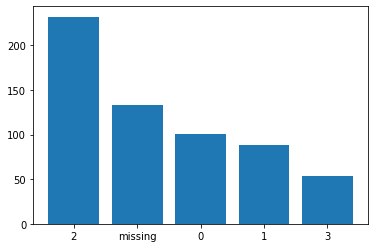

In [123]:
avg = common_set["work_interfere"].mean()
avg
median = common_set["work_interfere"].median()
median

value_counts = common_set["work_interfere"].value_counts(dropna=False)

bar_counts = value_counts.tolist()
bar_values = value_counts.index.tolist()
bar_values = ['2', 'missing', '0', '1', '3']
plt.bar(bar_values, bar_counts)

I have a ton of missing values for this variable. ooh, maybe I'll match the distribution. 

In [167]:
work = common_set["work_interfere"].value_counts(dropna=False)
total = len(common_set["work_interfere"])
nulls = bar_counts[1]

perc_threes = work[3]/(total-nulls)
perc_twos = work[2]/(total-nulls)
perc_ones = work[1]/(total-nulls)
perc_zeros = work[0]/(total-nulls)

In [185]:
import numpy as np
# get all null rows
work_interfere_nulls = common_set[common_set["work_interfere"].isnull()==True]
zero, one, two, three = np.split(work_interfere_nulls, 
                                 [int(perc_zeros*nulls), int(perc_ones*nulls), 
                                  int(perc_twos*nulls)])
perc_zeros*nulls, perc_ones*nulls, perc_twos*nulls, perc_threes*nulls

TypeError: _split_dispatcher() got an unexpected keyword argument 'random_state'

In [169]:
perc_zeros, perc_ones, perc_twos, perc_threes

(0.21263157894736842,
 0.18526315789473685,
 0.4884210526315789,
 0.11368421052631579)

In [183]:
len(zero), len(one), len(two), len(three)

(28, 0, 40, 69)

Fuck it, I'll just do average. It's the same anyway.

In [189]:
common_set["work_interfere"].fillna(value=avg,inplace=True)
common_set

,Age,Gender,Country,state,family_history,treatment,work_interfere,no_employees,remote_work,benefits,...,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,phys_health_interview,mental_vs_physical
20,29,Male,United States,NY,2,2,2.000000,3,0,2,...,0,0,0,3,1,0,1,1,0,0
22,46,Male,United States,MA,0,2,3.000000,2,2,2,...,0,0,1,2,1,0,1,2,1,0
24,33,Male,United States,CA,2,2,1.000000,2,0,2,...,1,2,2,2,0,0,2,2,2,1
26,33,Male,United States,TN,0,0,1.503158,0,0,1,...,0,1,1,2,1,1,1,0,0,1
28,34,Male,United States,OH,0,2,2.000000,2,2,1,...,0,1,1,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29,Male,United States,NC,2,2,2.000000,3,2,2,...,2,0,2,2,2,0,1,0,1,0
1254,26,Male,United Kingdom,NaN,0,2,1.503158,2,0,0,...,0,0,1,2,0,0,1,1,0,1
1255,32,Male,United States,IL,2,2,3.000000,2,2,2,...,0,0,2,3,0,0,1,2,0,2
1256,34,Male,United States,CA,2,2,2.000000,5,0,2,...,0,0,1,3,2,2,0,0,0,0


**Correlation plot FOR THE SUBSET**

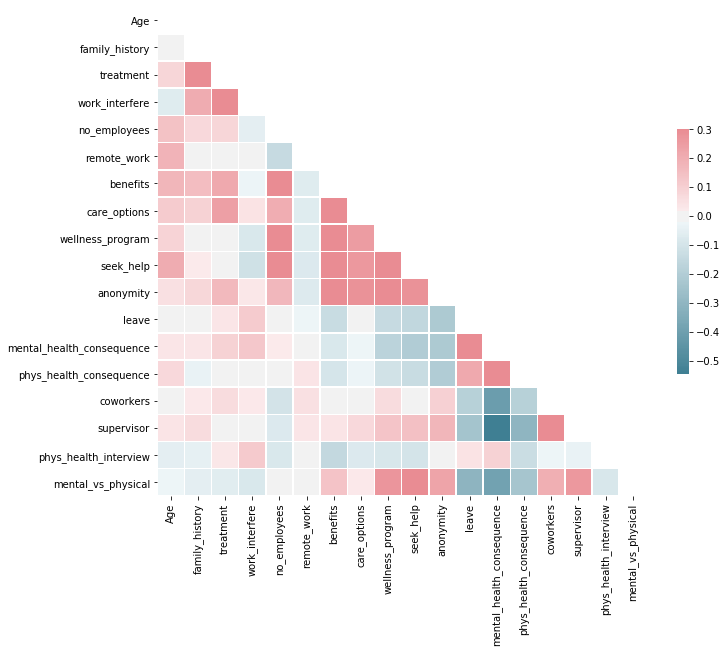

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = common_set.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

mental_health_consequence and supervisor are strongly negatively correlated  
mental_health_consequence and coworkers are also pretty negatively correlated  
benefits and {anonymity, seek_help, wellness_program, care_options} are all positively correlated  
  
but treatment is loosely correlated with a lot of things, maybe care_options, benefits, work_interfere the most positively  
  
translation:  
care_options = "Do you know the options for mental health care the employer provides?"  
benefits = "Does your employers offer mental health benefits?"  
work_interfere = "If you have a mental health condition, do you feel that it interferes with your work?" 

This makes sense that it would predict treatment, so maybe just try a model where those 3 predict - maybe some multiple linear regression?

Also try this correlation plot on the entire dataset, cleaning it as I did the subset.


In [194]:
# clean entire df the way I did on the subset
df = mydf

df = df.replace('Yes', 2)
df = df.replace('No', 0)

df = df.replace("Don't know", 1); 
df = df.replace("Some of them", 1);
df = df.replace("Maybe", 1); 
df = df.replace("Not sure", 1); 

df.replace({'work_interfere':{'Never':0, 'Rarely':1, 'Sometimes': 2, 'Often':3}},inplace=True)
df.replace({'leave':{1:2}},inplace=True) # I don't know is seen as neutral, which would make it 2
df.replace({'leave':{'Very easy':0, 'Somewhat easy':1, 'Somewhat difficult': 3, 'Very difficult':4}}, inplace=True)
df.replace({'no_employees':{'1-5':0,'6-25':1, '26-100':2,'100-500':3,'500-1000':4, 'More than 1000':5}}, inplace=True)

unique values of Age are: 
 [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61 11 72]
unique values of Gender are: 
 ['Female' 'Male' 'Gender non-conforming']
unique values of Country are: 
 ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines']
unique values of state are: 
 ['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA' 'IA' 'PA'
 'WA' 'WI' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC' 'NE' 'WV'
 'OK' 'KS' 'VA' 'NH' 'KY' 'AL' 

In [195]:
avg = df["work_interfere"].mean()
df["work_interfere"].fillna(value=avg,inplace=True)
get_unique(df)

unique values of Age are: 
 [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61 11 72]
unique values of Gender are: 
 ['Female' 'Male' 'Gender non-conforming']
unique values of Country are: 
 ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines']
unique values of state are: 
 ['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA' 'IA' 'PA'
 'WA' 'WI' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC' 'NE' 'WV'
 'OK' 'KS' 'VA' 'NH' 'KY' 'AL' 

**Correlation plot** - TO DO: more work, need to re-factor some stuff

In [197]:
df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,0,2,3.000000,1,0,...,2,1,0,0,1,2,0,1,2,0
1,44,Male,United States,IN,NaN,0,0,1.000000,5,0,...,1,2,1,0,0,0,0,0,1,0
2,32,Male,Canada,NaN,NaN,0,0,1.000000,1,0,...,1,3,0,0,2,2,2,2,0,0
3,31,Male,United Kingdom,NaN,NaN,2,2,3.000000,2,0,...,0,3,2,2,1,0,1,1,0,2
4,31,Male,United States,TX,NaN,0,0,0.000000,3,2,...,1,2,0,0,1,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,NaN,0.0,0,2,1.536364,2,0,...,1,1,0,0,1,1,0,0,1,0
1255,32,Male,United States,IL,0.0,2,2,3.000000,2,2,...,2,3,0,0,1,2,0,0,2,0
1256,34,Male,United States,CA,0.0,2,2,2.000000,5,0,...,1,3,2,2,0,0,0,0,0,0
1257,46,Female,United States,NC,0.0,0,0,1.536364,3,2,...,1,2,2,0,0,0,0,0,0,0


In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

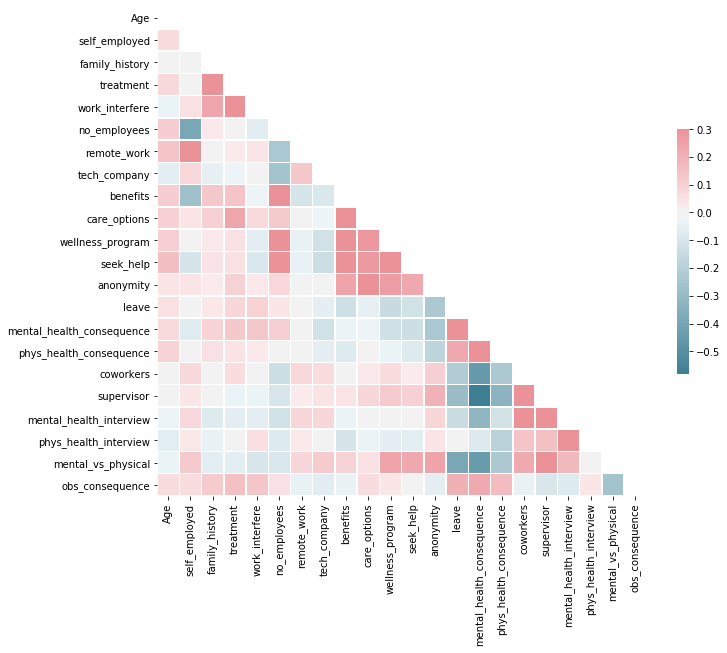

In [202]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

work_interfere and care_options predicts treatment for the entire dataset, so probably good to run a model on it at this point

probably go and investigate the other stuff from this correlation plot later because it looks interesting
honestly see how much care_options does it because work_interfere has a lot of missing values

**Linear Regression**

<BarContainer object of 1254 artists>

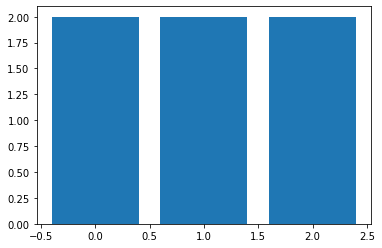

In [215]:
import matplotlib.pyplot as plt

care = df.care_options
treat = df.treatment